In [1]:
import mne 
import scipy.io
import numpy as np
import mne
from mne.io import RawArray
from mne import create_info
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
%matplotlib notebook
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

In [2]:
raw = mne.io.read_raw_fif(r"C:\Users\sonam\University of Canberra\4th Semester\Capstone\FIF_200\session_1\cz\cz_eeg1.fif", preload = True)

Opening raw data file C:\Users\sonam\University of Canberra\4th Semester\Capstone\FIF_200\session_1\cz\cz_eeg1.fif...
    Range : 0 ... 33600 =      0.000 ...   168.000 secs
Ready.


C:\Users\sonam\AppData\Local\Temp\ipykernel_1888\1610847222.py:1: RuntimeWarning: This filename (C:\Users\sonam\University of Canberra\4th Semester\Capstone\FIF_200\session_1\cz\cz_eeg1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r"C:\Users\sonam\University of Canberra\4th Semester\Capstone\FIF_200\session_1\cz\cz_eeg1.fif", preload = True)


Reading 0 ... 33600  =      0.000 ...   168.000 secs...


In [3]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 62 EEG
 custom_ref_applied: False
 dig: 65 items (3 Cardinal, 62 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 62
 projs: []
 sfreq: 200.0 Hz
>

In [4]:
duration_seconds = raw.n_times / raw.info['sfreq']
print("Duration of the raw EEG data:", duration_seconds, "seconds")

Duration of the raw EEG data: 168.005 seconds


# 1. Artifact Detection

In [5]:
ssp_projectors = raw.info["projs"]
raw.del_proj()

<Raw | cz_eeg1.fif, 62 x 33601 (168.0 s), ~16.0 MB, data loaded>

### 1.1 Low-frequency drifts
Low-frequency drifts are readily removed by high-pass filtering at a fairly low cutoff frequency 
 (the wavelength of the drifts seen above is probably around 20 seconds, 
 so in this case a cutoff of 0.1 Hz would probably suppress most of the drift).

Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


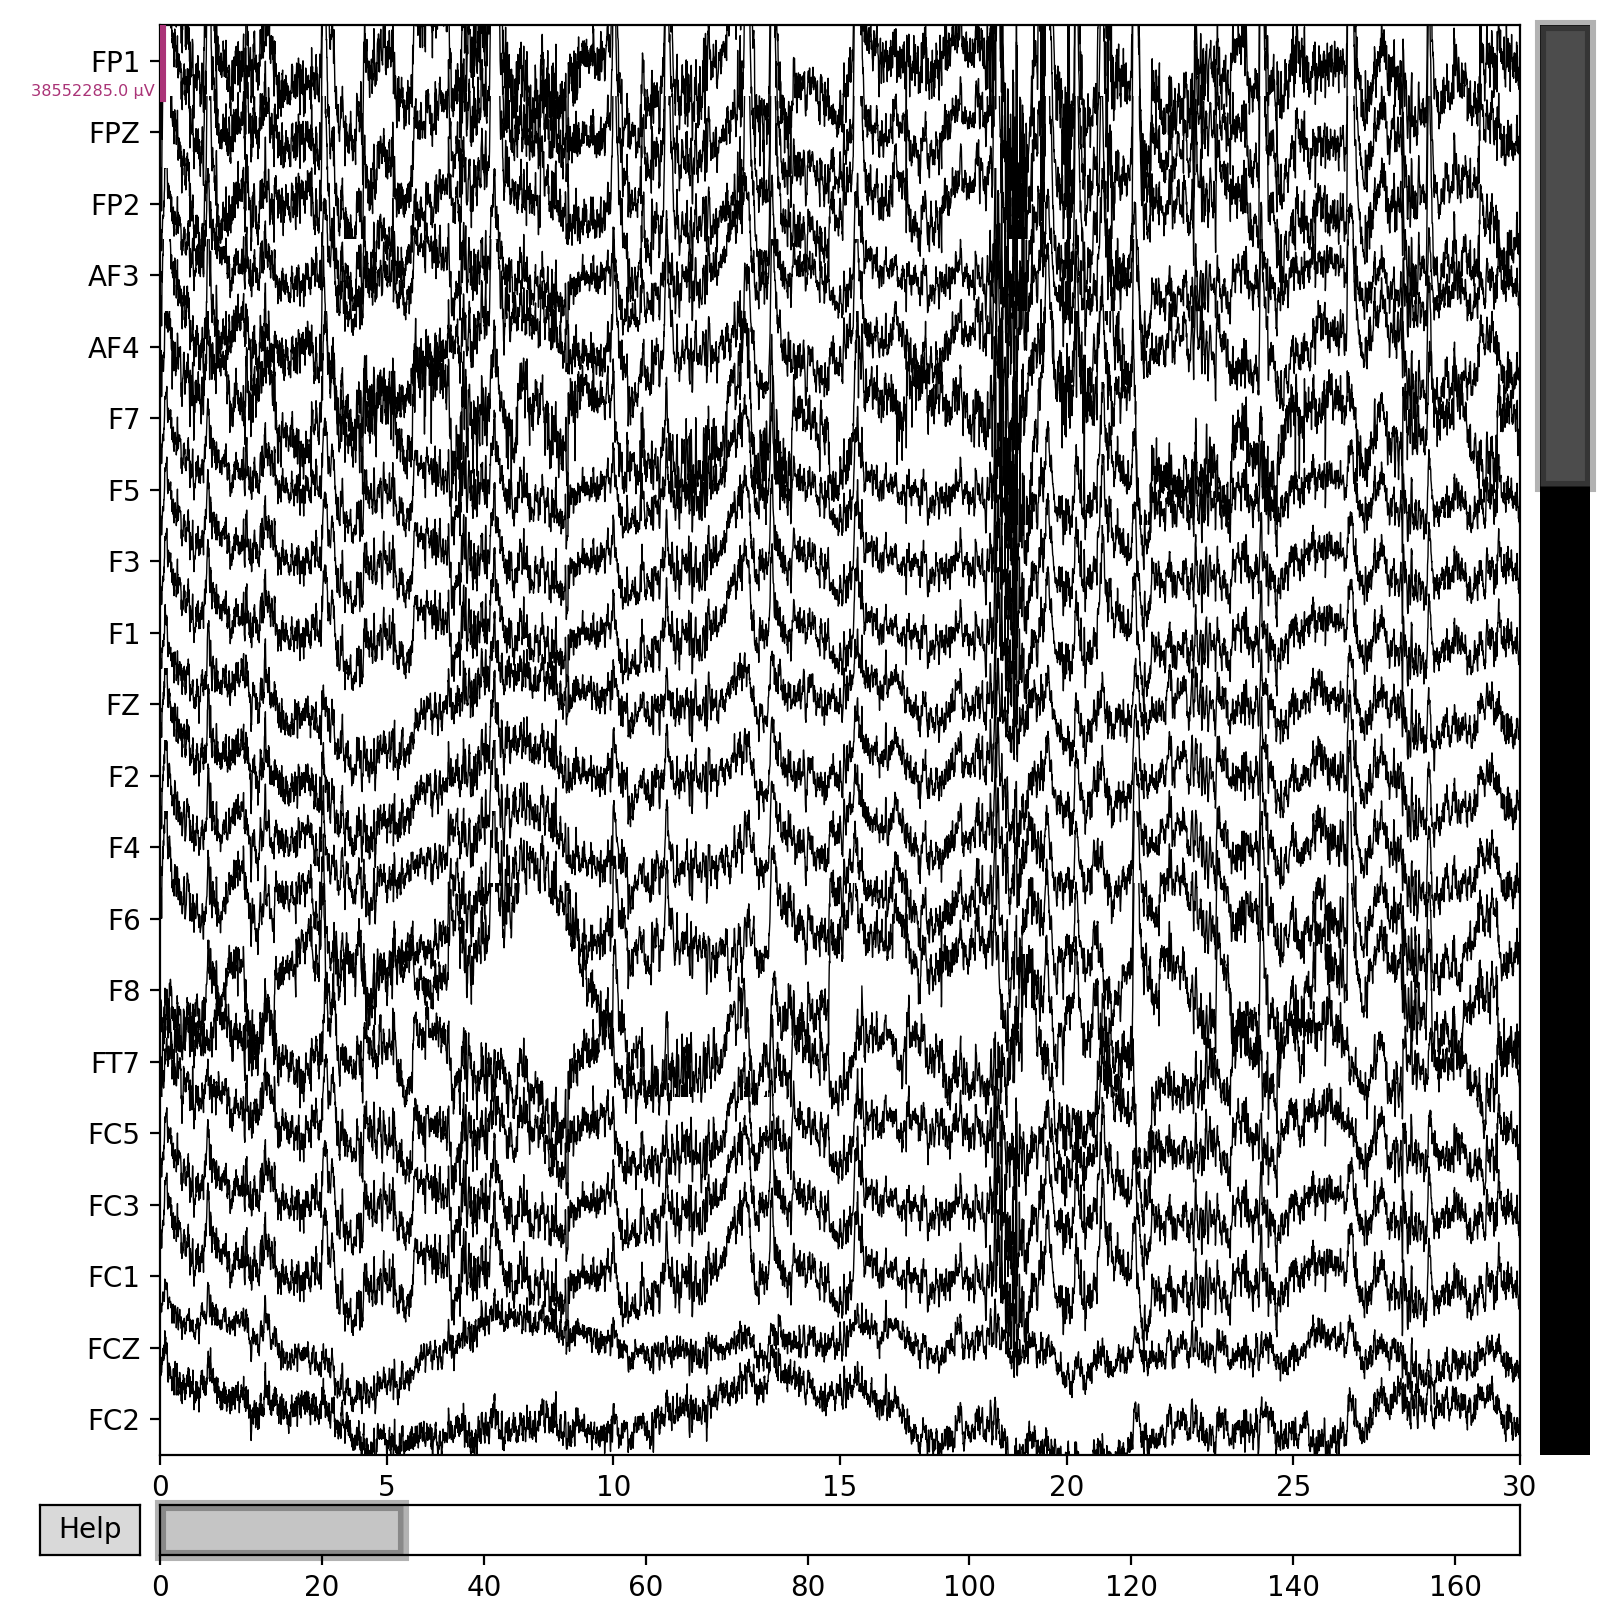

<IPython.core.display.Javascript object>


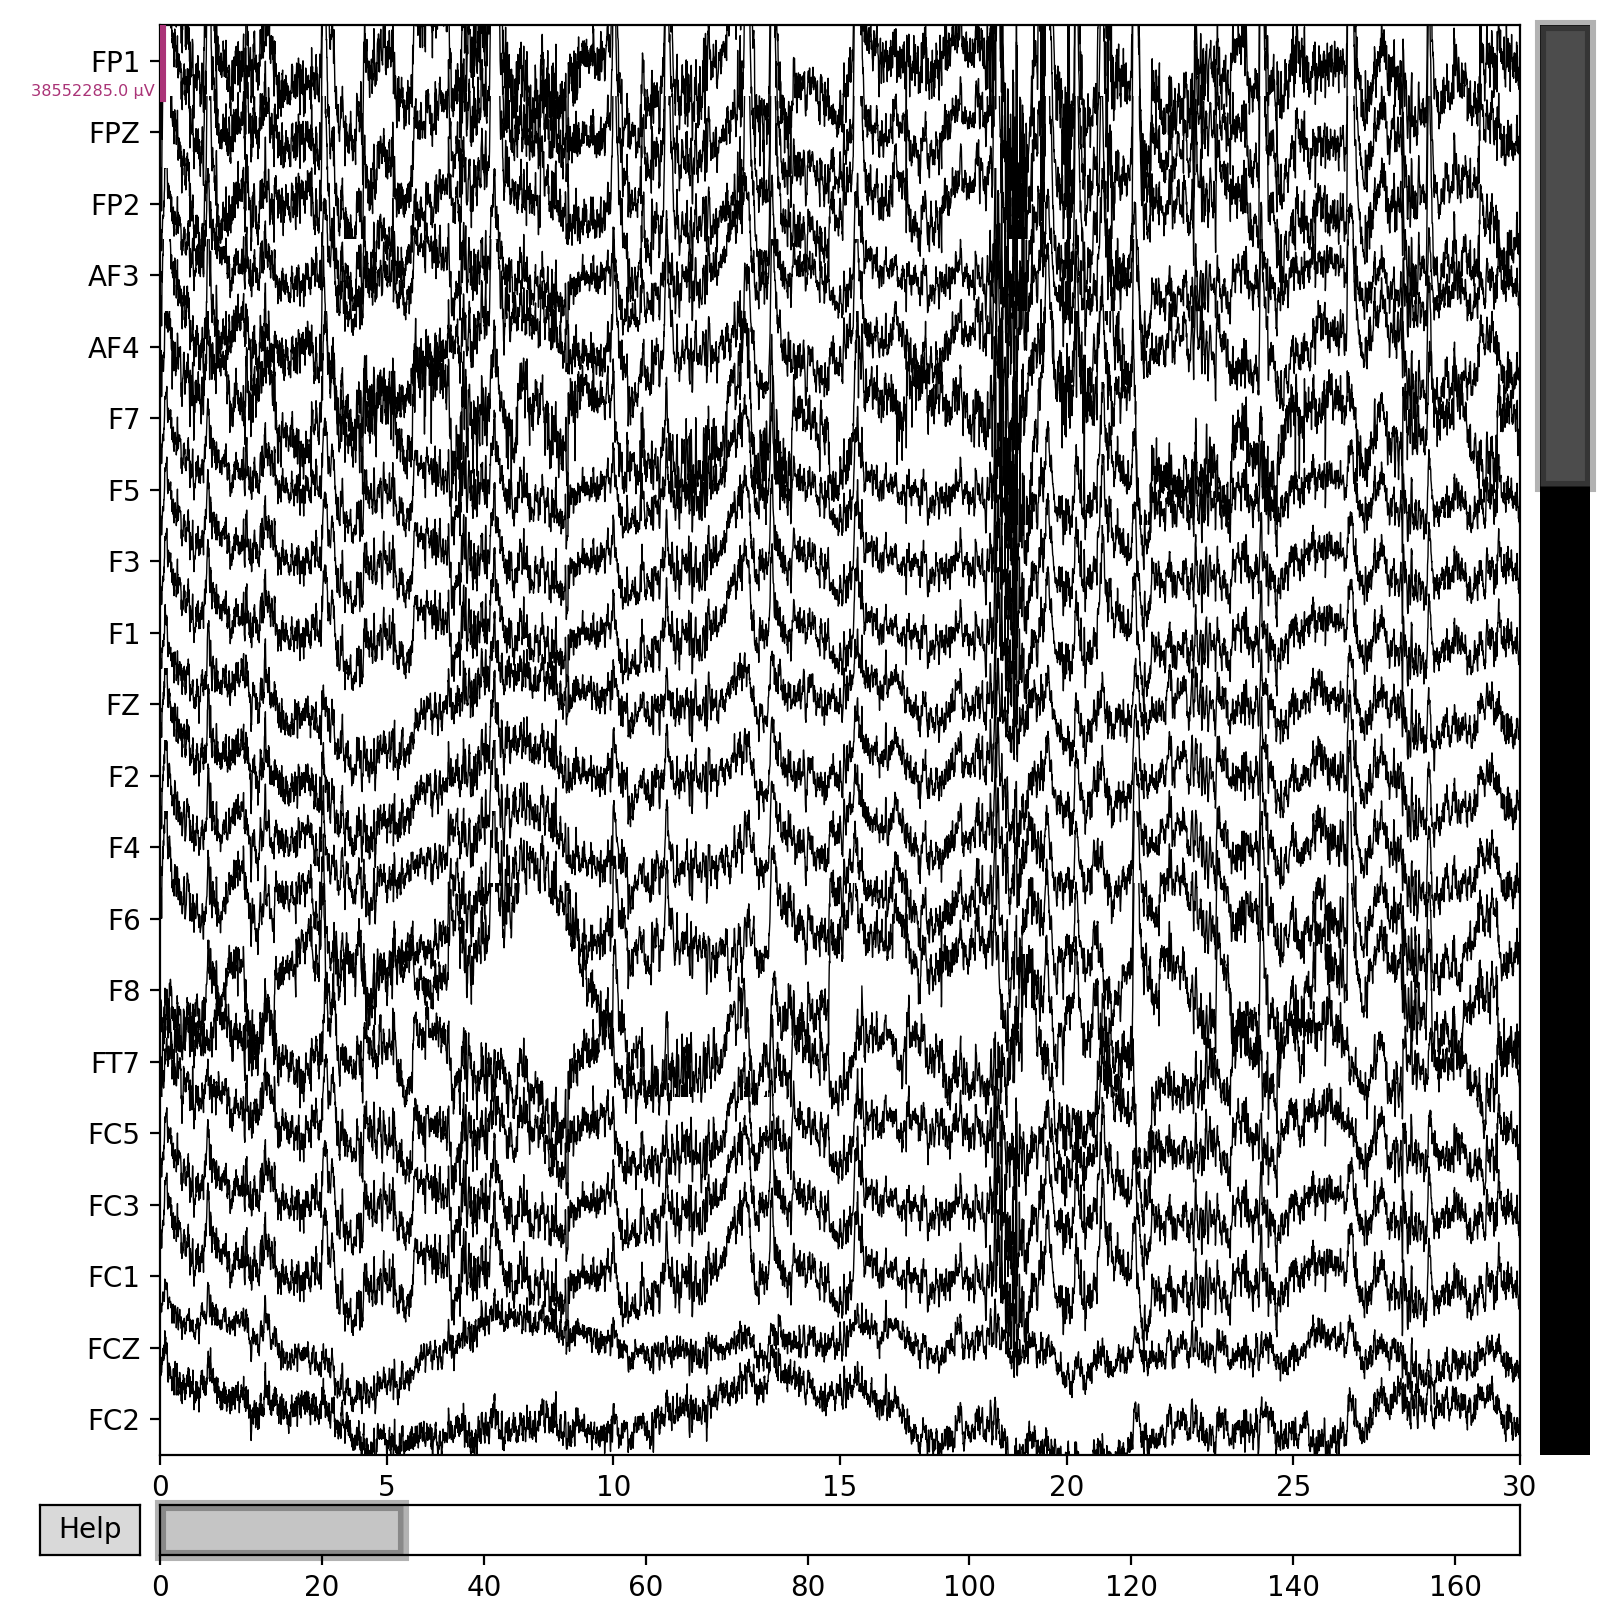

In [6]:
raw.plot(duration=30, n_channels=20, scalings='auto')

### 1.2 Power line noise
Power line noise, also known as mains hum or electrical interference,
refers to unwanted electrical signals that contaminate recorded data.In EEG and other physiological recordings, power line noise can manifest as rhythmic fluctuations or periodic peaks in the data, which can obscure underlying neural signals and affect data quality.

Plot the frequency spectrum of your EEG data and visually inspect it for peaks at the frequency of the power line. If we observe prominent peaks at 50 Hz (for regions with 50 Hz power line frequency) or 60 Hz (for regions with 60 Hz power line frequency), it indicates the presence of power line noise.

Effective window size : 10.240 (s)


<IPython.core.display.Javascript object>


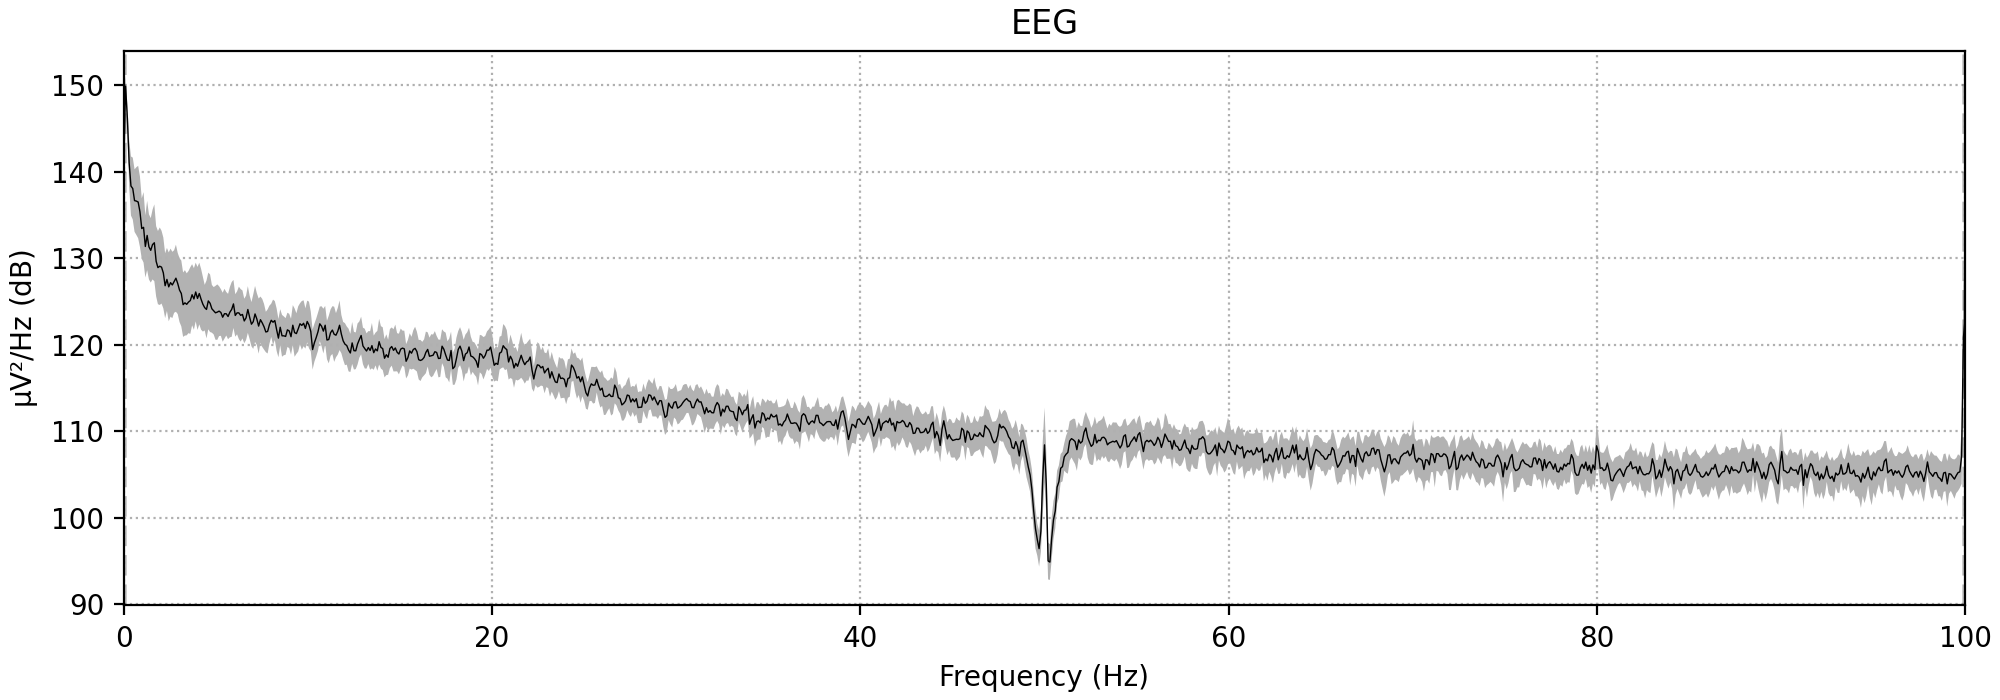

<IPython.core.display.Javascript object>


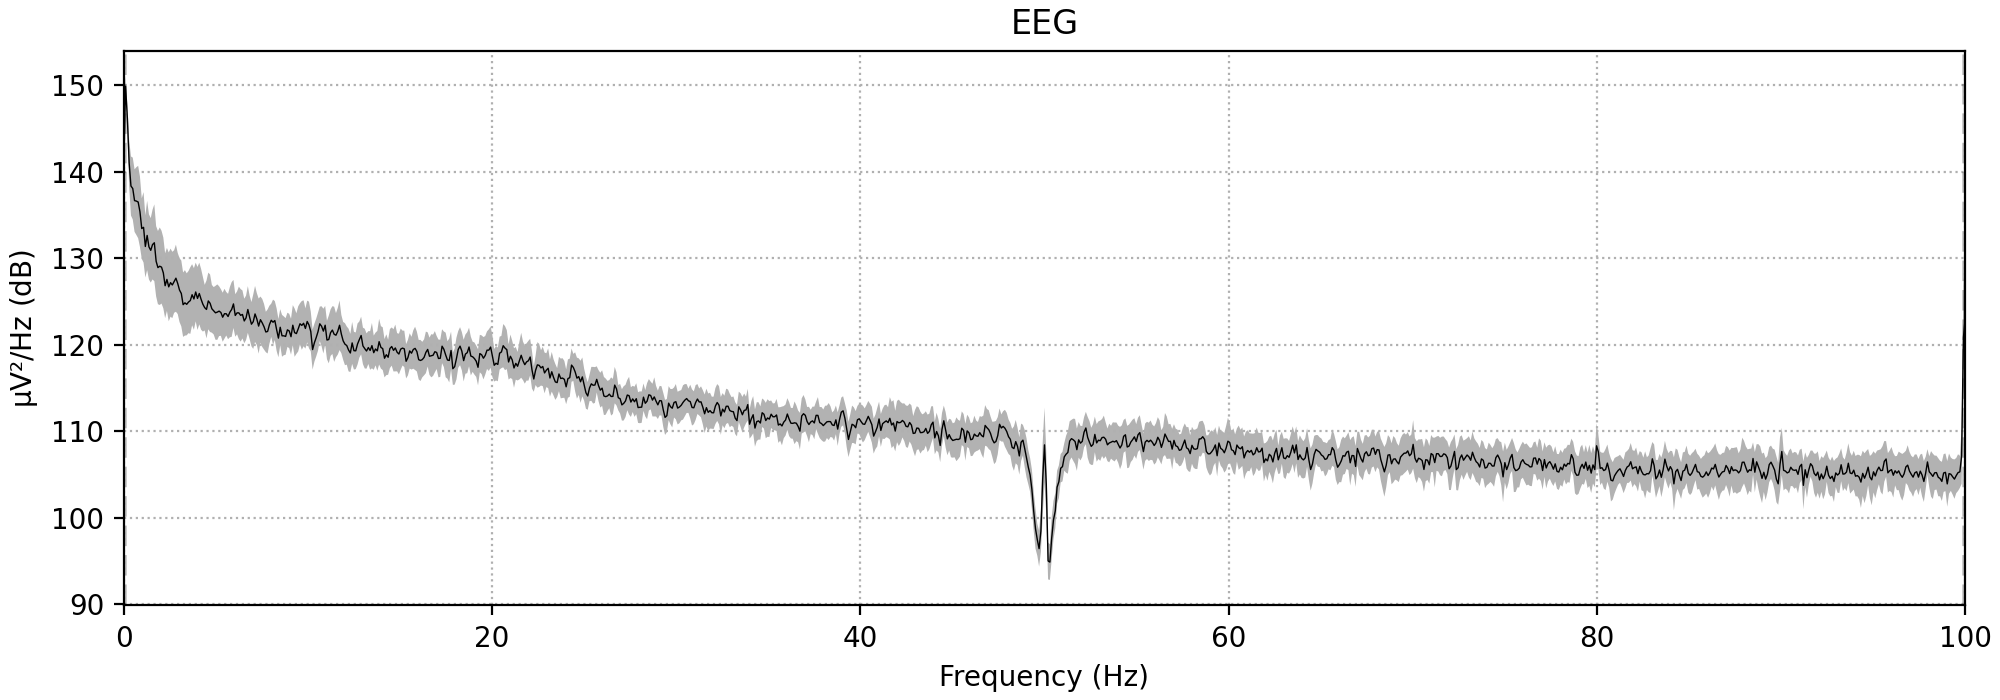

In [7]:

spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")


plotted the frequency spectrum of EEG data and did not observe prominent peaks at 50 Hz or 60 Hz, it suggests that there might not be significant power line noise contaminating the EEG recordings. 

### 1.3 Heartbeat artifacts (ECG)
ECG artifacts can contaminate EEG recordings, particularly in electrodes located near the heart. These artifacts can obscure or distort EEG signals, making it challenging to analyze brain activity accurately. Removing ECG artifacts can help improve the overall signal quality of EEG data.

Insufficient Sensor Types: MNE-Python attempts to create an artificial ECG channel from magnetometer or gradiometer data if dedicated ECG channels are not available. However, if your data does not contain magnetometer or gradiometer channels, it cannot synthesize an ECG channel.

## 1.4 Ocular artifacts (EOG)

In [8]:
# Detect EOG artifacts
# mne.preprocessing.find_eog_events(raw, event_id=998, l_freq=1, h_freq=10, filter_length='10s', ch_name=None, tstart=0, reject_by_annotation=False, thresh=None, verbose=None)
# RuntimeError: No EOG channel(s) found


# 2. Rejecting bad data spans and breaks
None 

# 3. Filtering and resampling data
A filter removes or attenuates parts of a signal. Usually, filters act on specific frequency ranges of a signal — for example, suppressing all frequency components above or below a certain cutoff value. 

### 3.3 Resampling

Downsampling is typically performed during the preprocessing stage of EEG data analysis, often after initial filtering and artifact removal steps. 

In [9]:
raw_downsampled = raw.copy().resample(sfreq=200)
raw_downsampled.info

Sampling frequency of the instance is already 200.0, returning unmodified.


<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 62 EEG
 custom_ref_applied: False
 dig: 65 items (3 Cardinal, 62 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 62
 projs: []
 sfreq: 200.0 Hz
>

In [10]:
print(raw_downsampled)

<Raw | cz_eeg1.fif, 62 x 33601 (168.0 s), ~16.0 MB, data loaded>


In [11]:
duration_seconds = raw_downsampled.n_times / raw.info['sfreq']
print("Duration of the raw EEG data:", duration_seconds, "seconds")

Duration of the raw EEG data: 168.005 seconds


Effective window size : 10.240 (s)


<IPython.core.display.Javascript object>


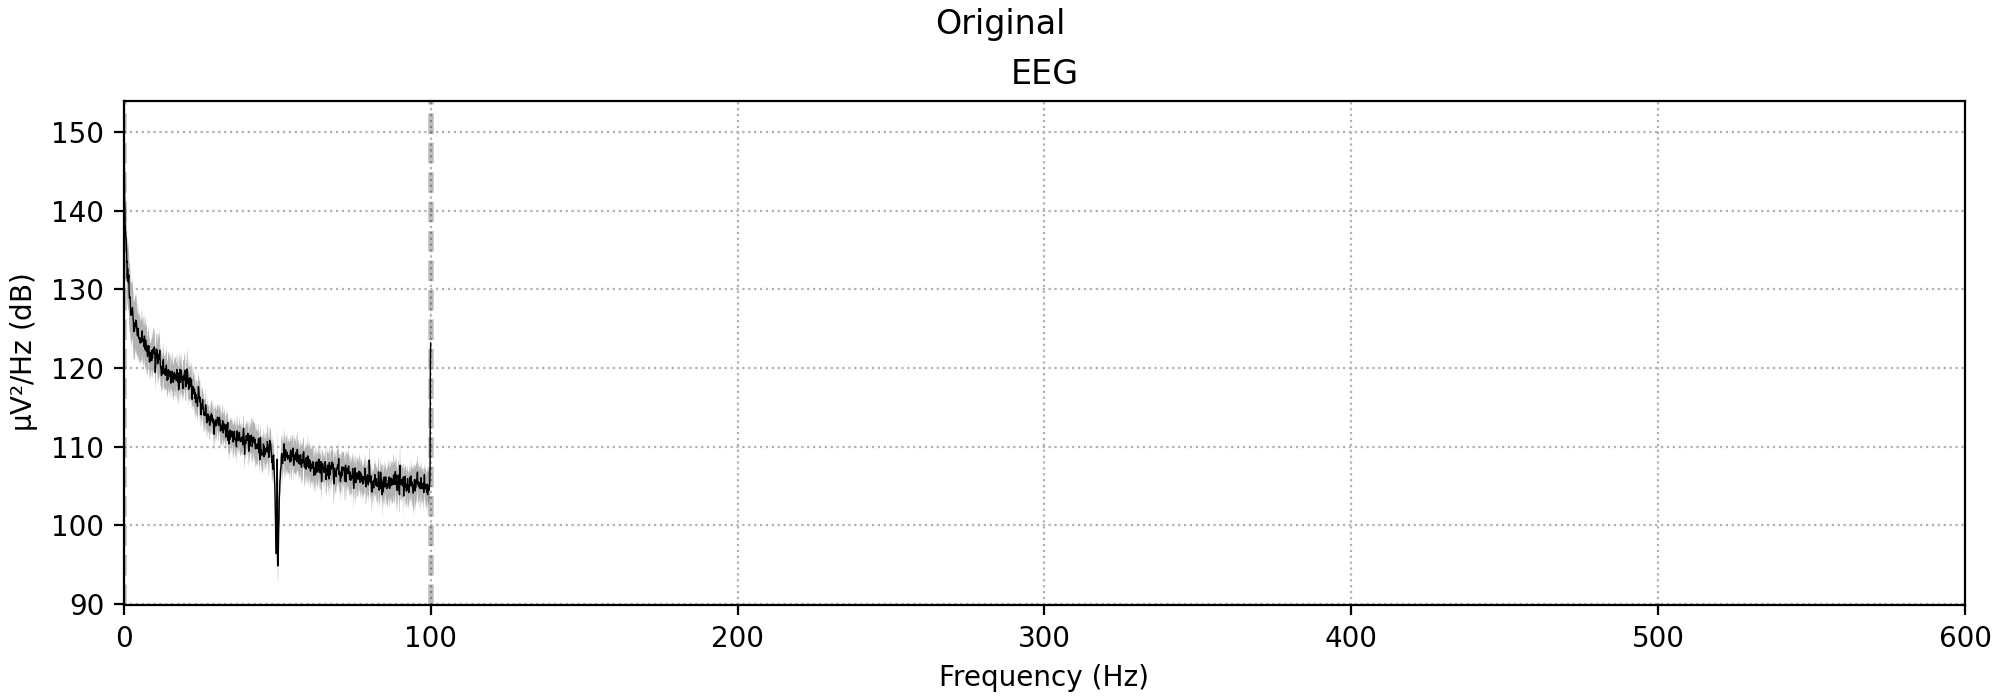

Effective window size : 10.240 (s)


<IPython.core.display.Javascript object>


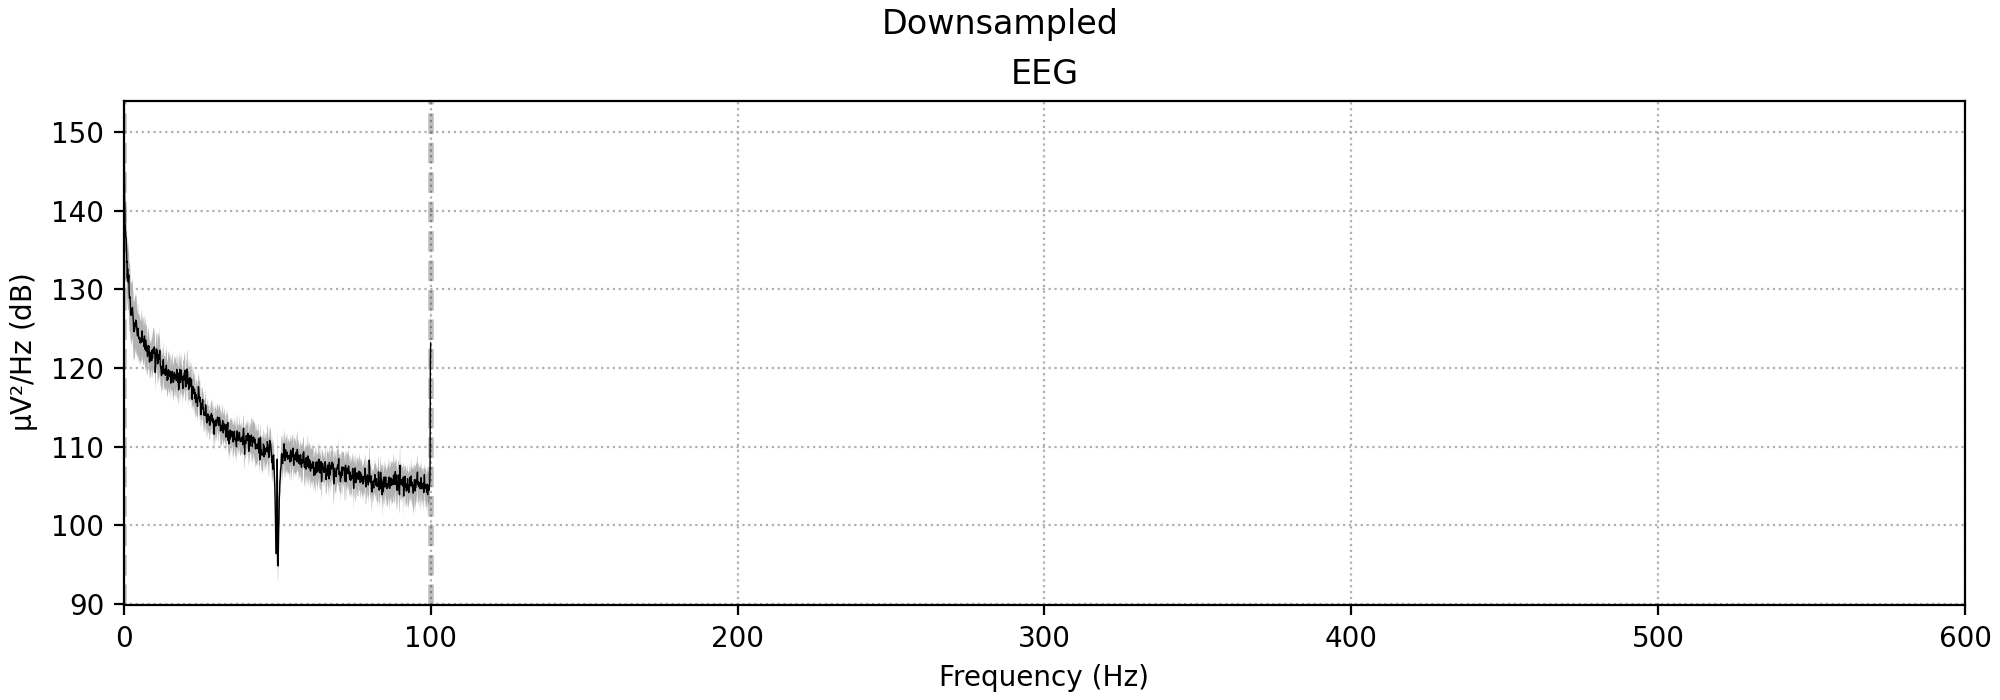

In [12]:
# Compare original data with downsampled data

for data, title in zip([raw, raw_downsampled], ["Original", "Downsampled"]):
    fig = data.compute_psd().plot(average=True, picks="data", exclude="bads")
    fig.suptitle(title)
    plt.setp(fig.axes, xlim=(0, 600))

## 3.1 Slow Drifts


<IPython.core.display.Javascript object>


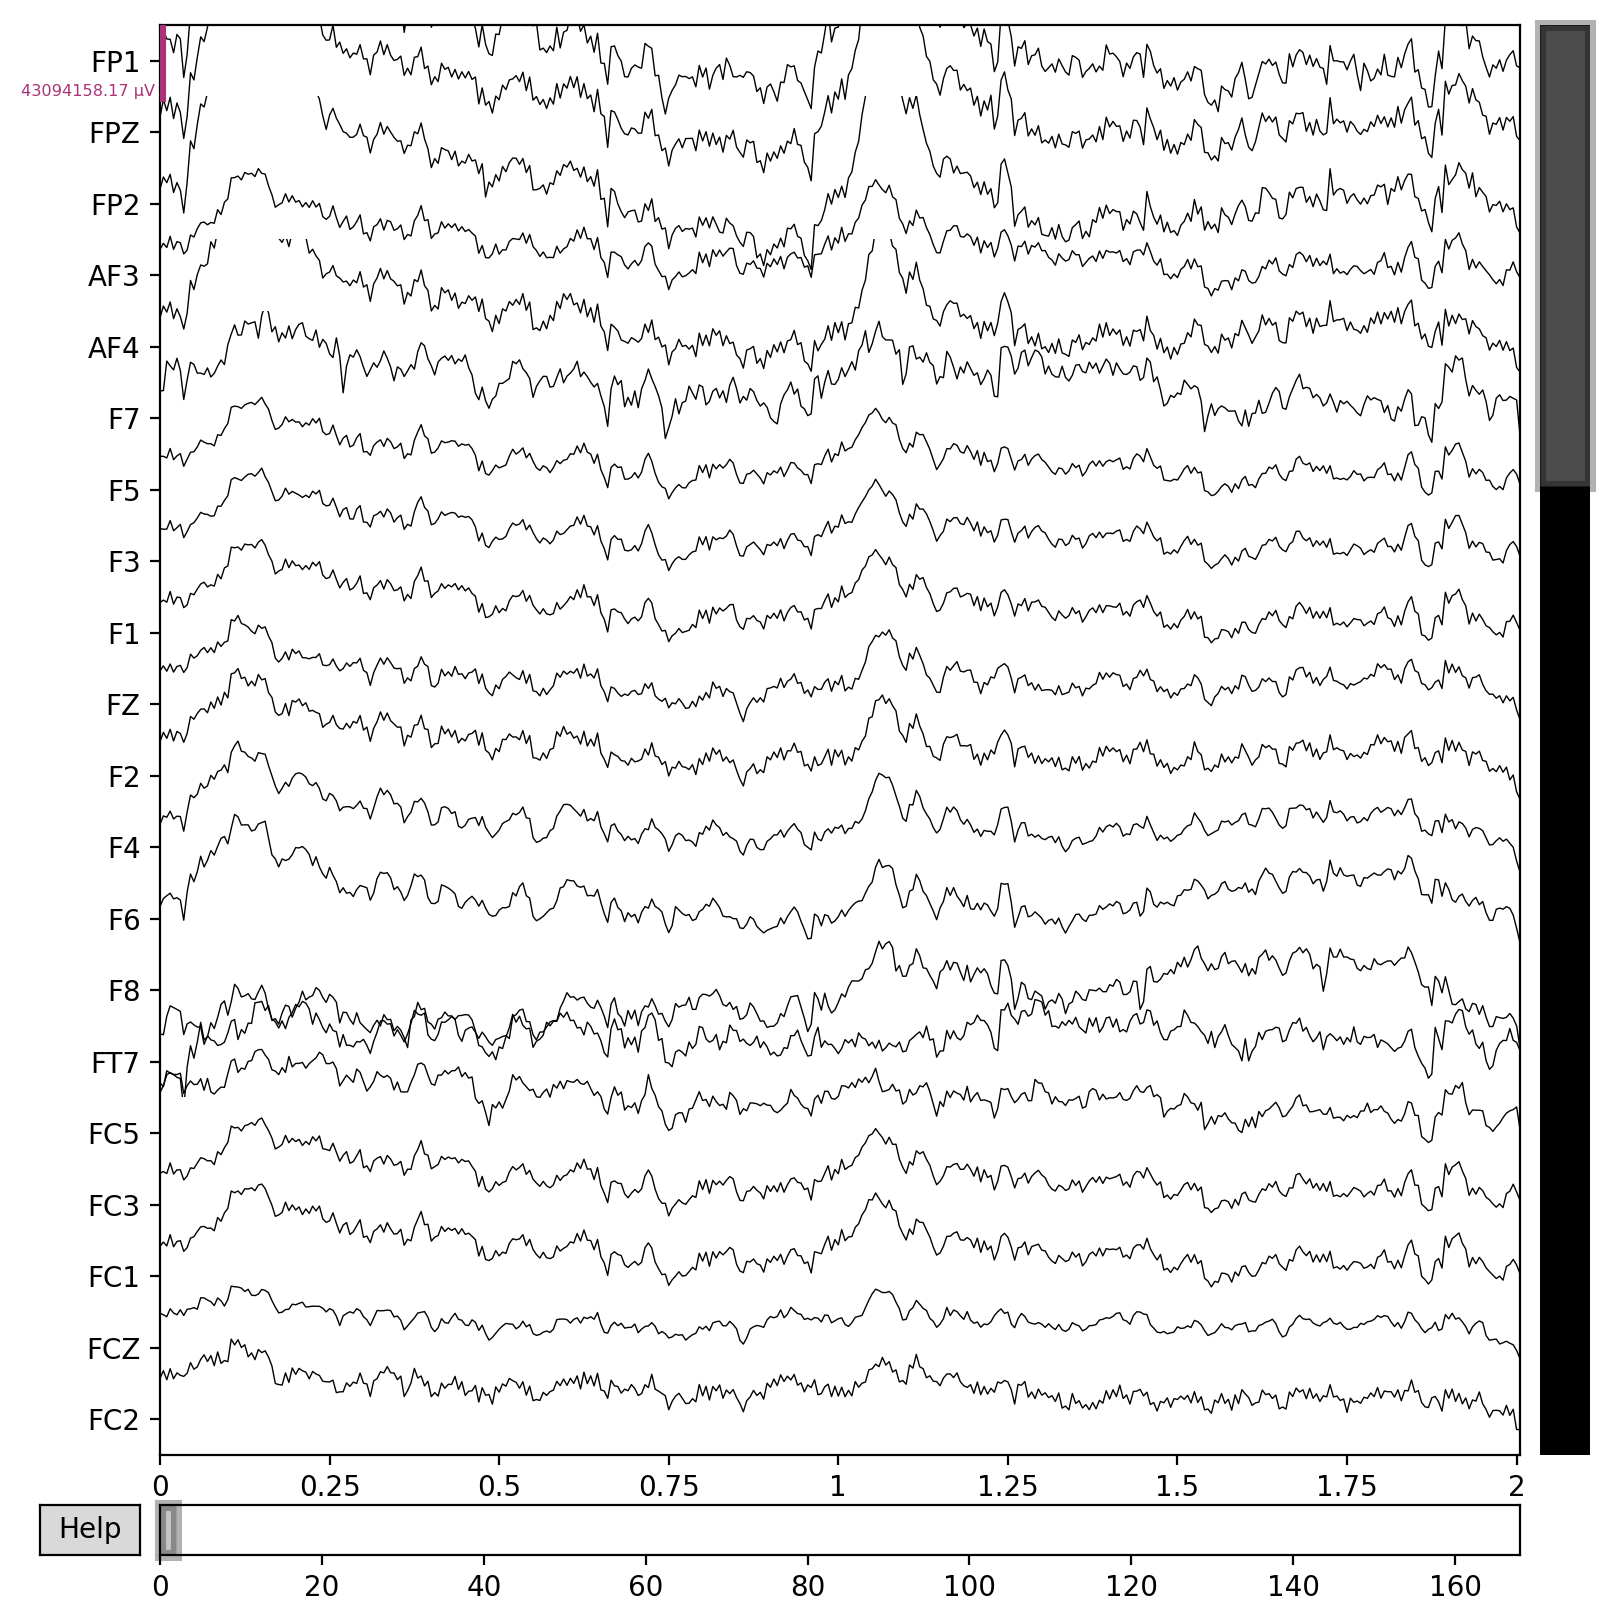

<IPython.core.display.Javascript object>


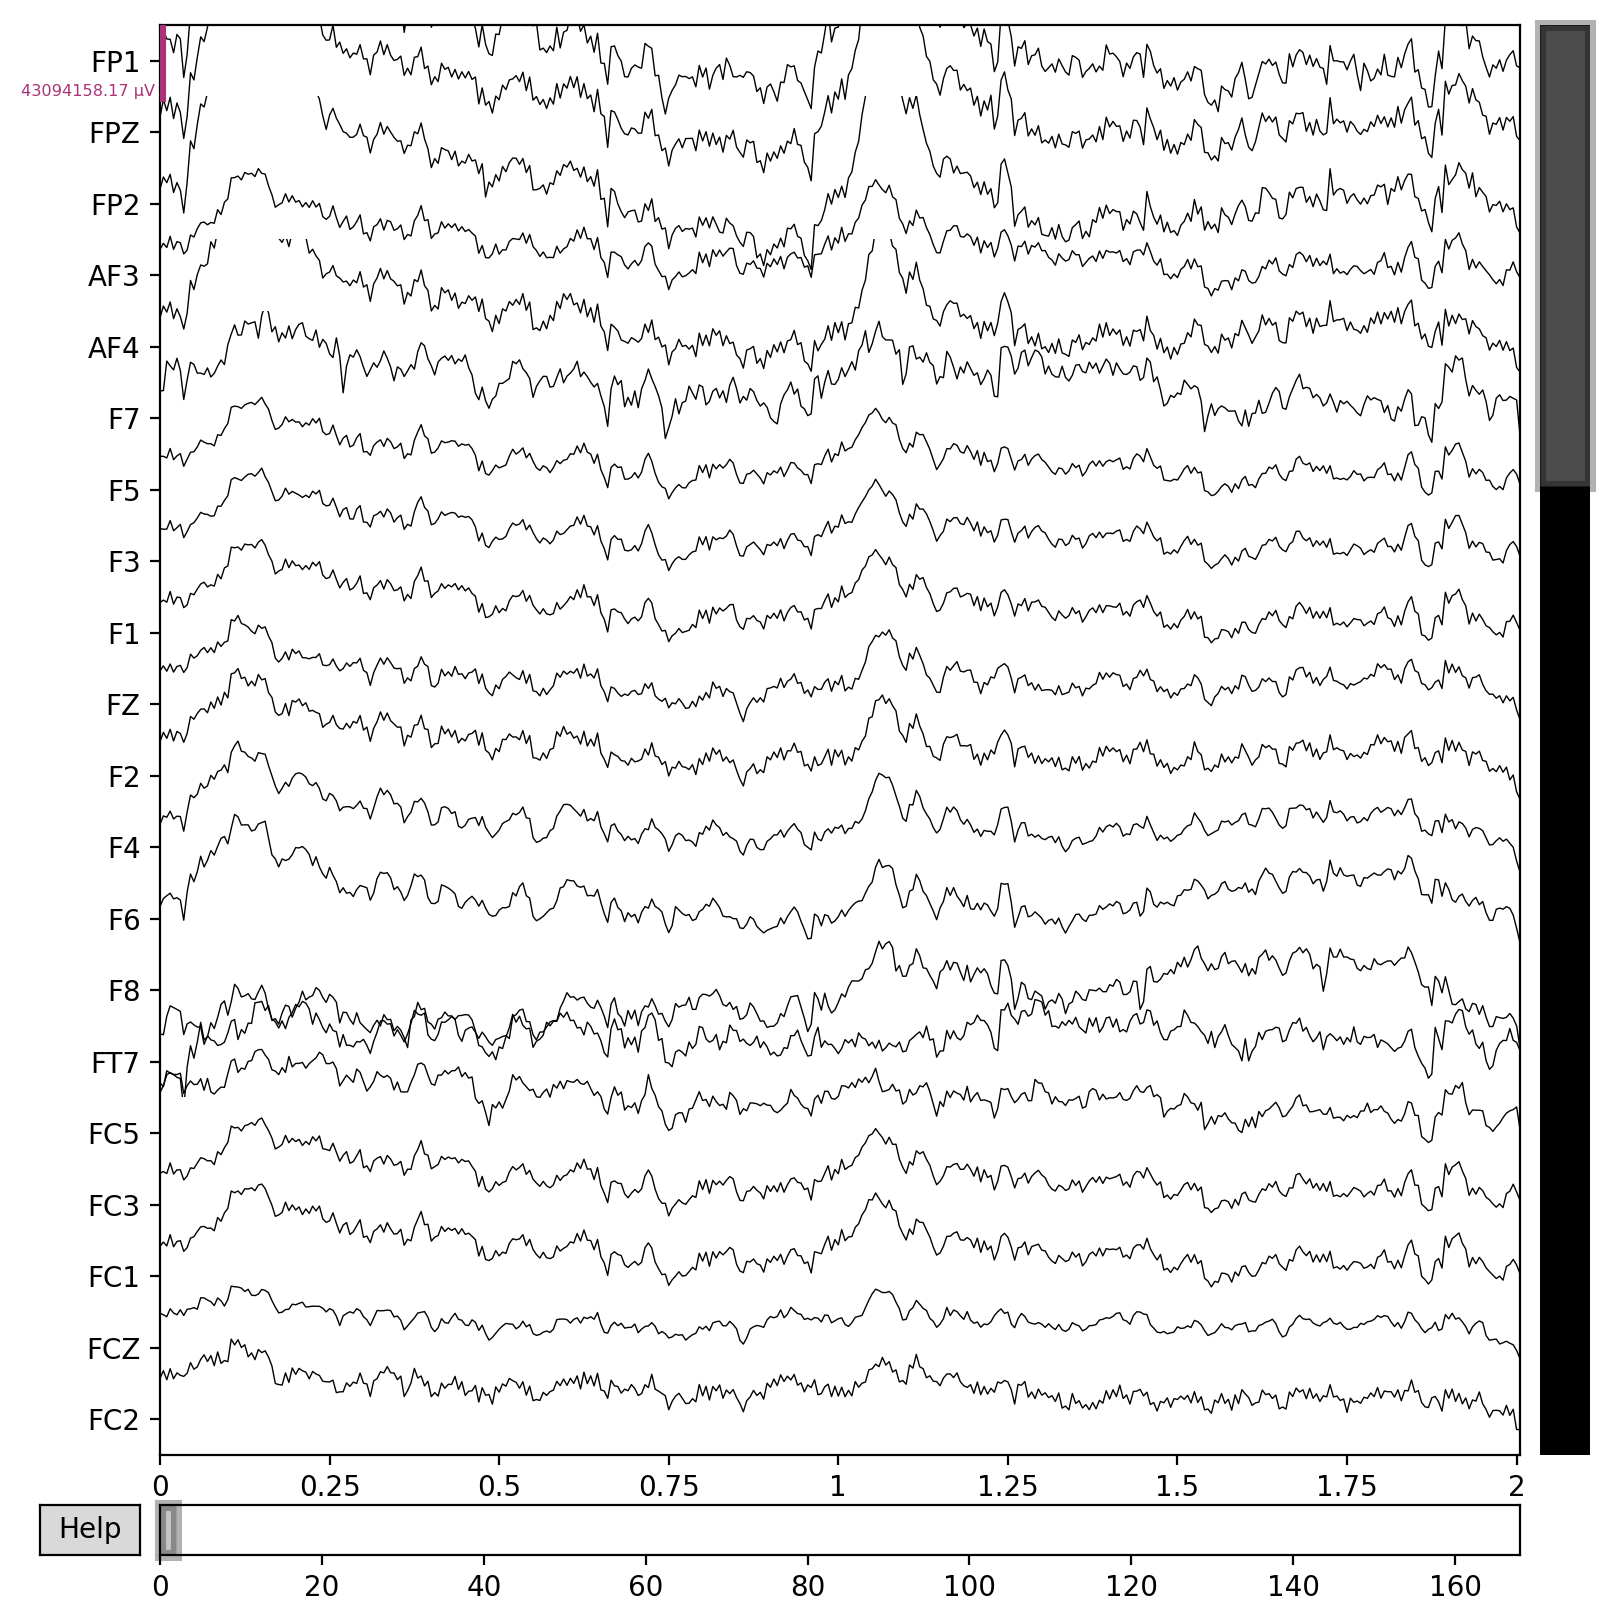

In [24]:
raw.plot(duration=2, proj=False, n_channels=20, remove_dc=False, scalings='auto')

<!-- ### High-Pass Filter: 
A high-pass filter is a signal processing filter that attenuates or removes low-frequency components from a signal while allowing high-frequency components to pass through. In the context of EEG data analysis, applying a high-pass filter helps remove slow drifts and baseline fluctuations from the EEG signal, which are often caused by non-neural sources such as electrode drift, movement artifacts, or physiological processes like respiration and cardiac activity. -->

In [14]:
# for cutoff in (0.1, 1):
#     raw_downsampled_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
#     with mne.viz.use_browser_backend("matplotlib"):
#         fig = raw_downsampled_highpass.plot(
#             duration=30, proj=False, n_channels=20, remove_dc=False, scalings="auto"
#         )
#     fig.subplots_adjust(top=0.9)
#     fig.suptitle(
#         "High-pass filtered at {} Hz".format(cutoff), size="xx-large", weight="bold"
#     )

In [15]:
# filter_params = mne.filter.create_filter(
#     raw_downsampled.get_data(), raw.info["sfreq"], l_freq=1, h_freq=None
# )

In [16]:
# mne.viz.plot_filter(filter_params, raw_downsampled.info["sfreq"], flim=(0.01, 5))

## Bandpass Filter

In [17]:

# only keeping frequencies between 0.5-42 Hz
raw_downsampled_bandpass= raw_downsampled.filter(l_freq=0.5, h_freq=42.0) 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 42 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 42.00 Hz
- Upper transition bandwidth: 10.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    0.0s finished


In [21]:
print(raw_downsampled_bandpass)

<Raw | cz_eeg1.fif, 62 x 33601 (168.0 s), ~16.0 MB, data loaded>


<IPython.core.display.Javascript object>


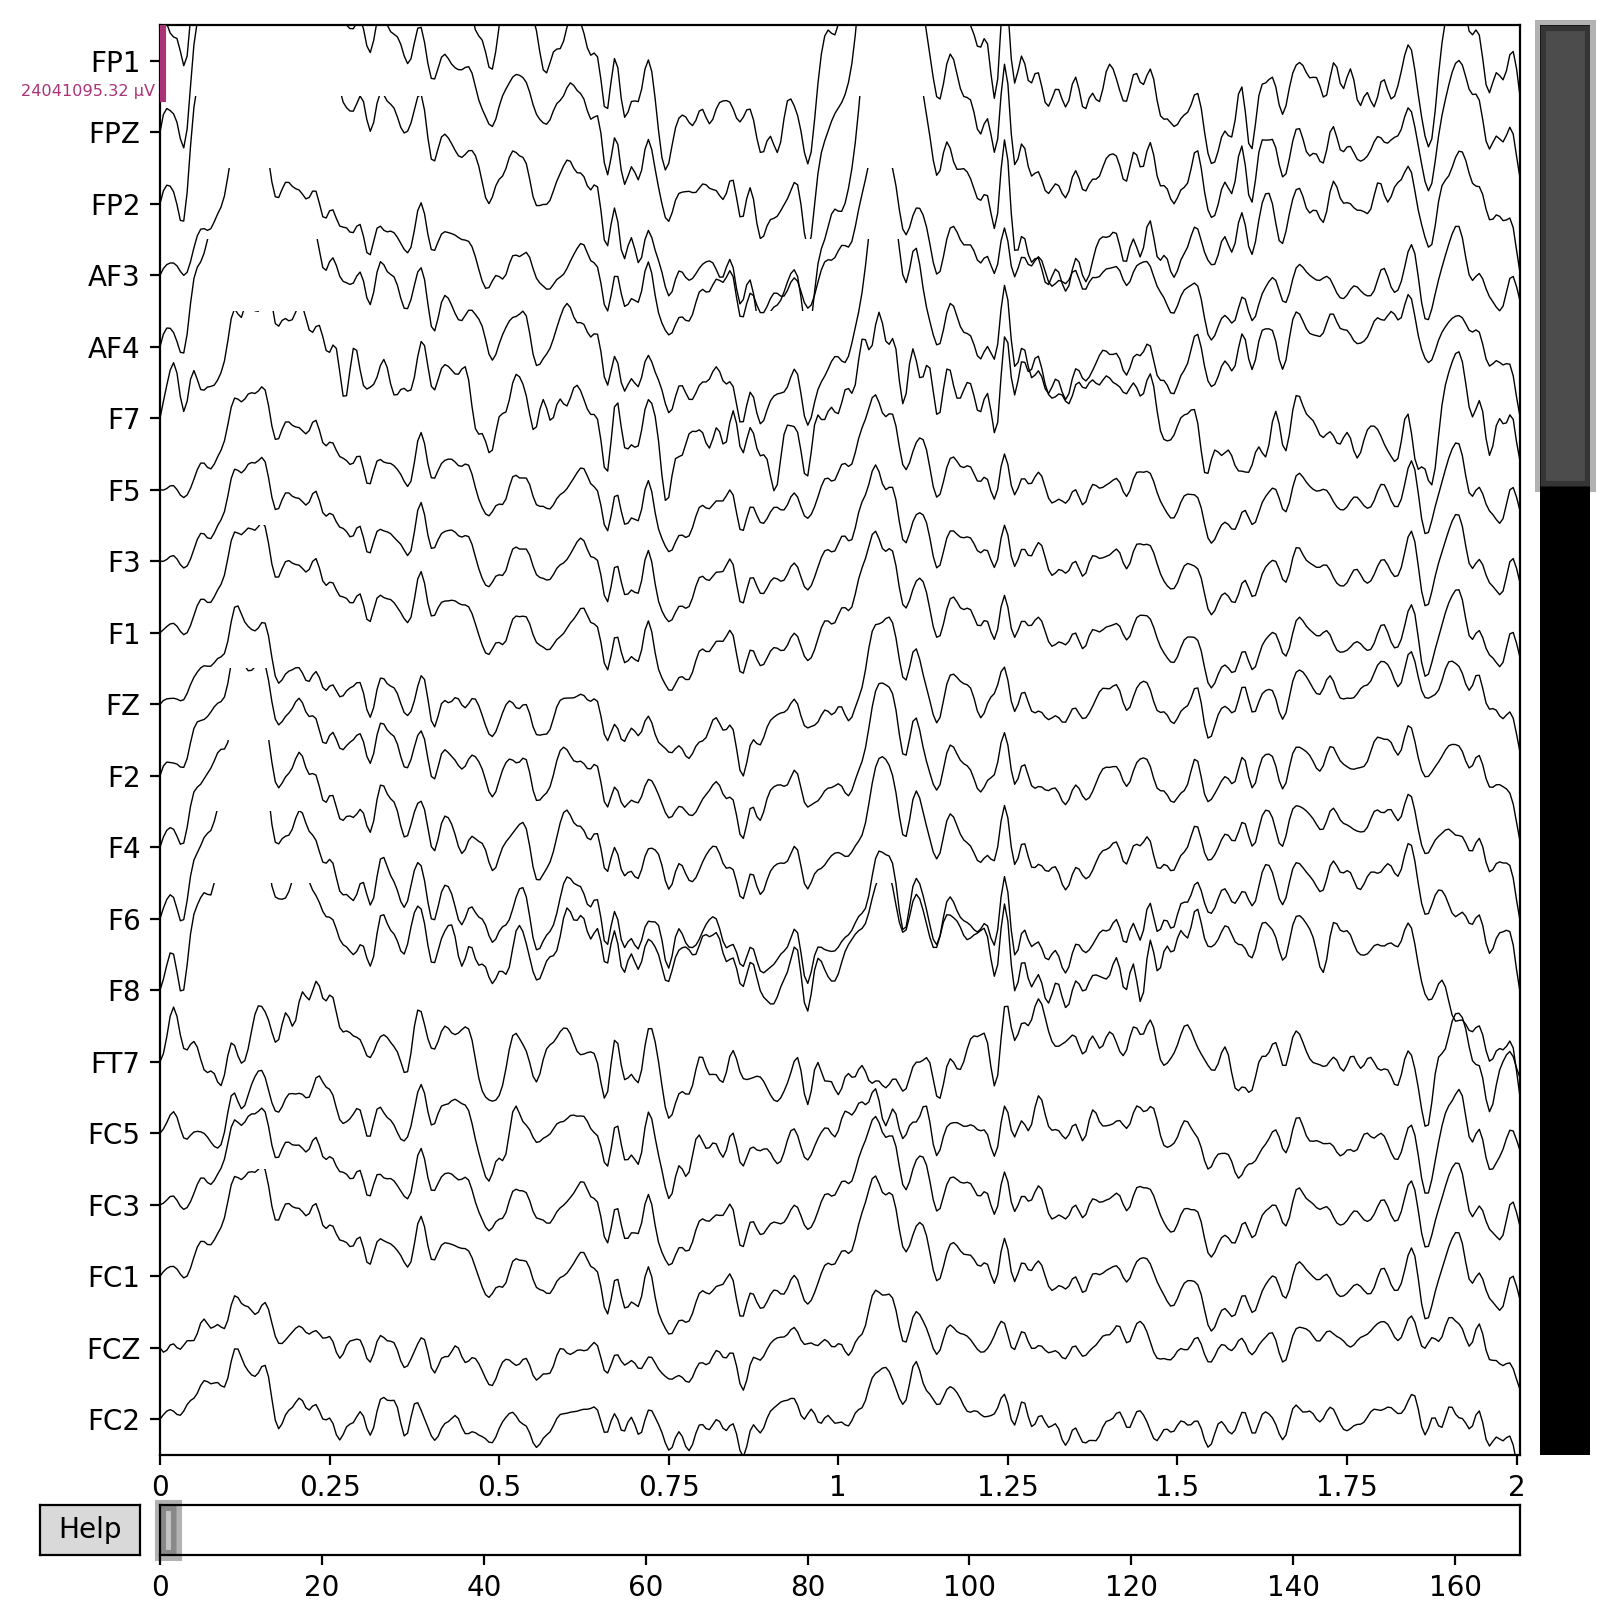

<IPython.core.display.Javascript object>


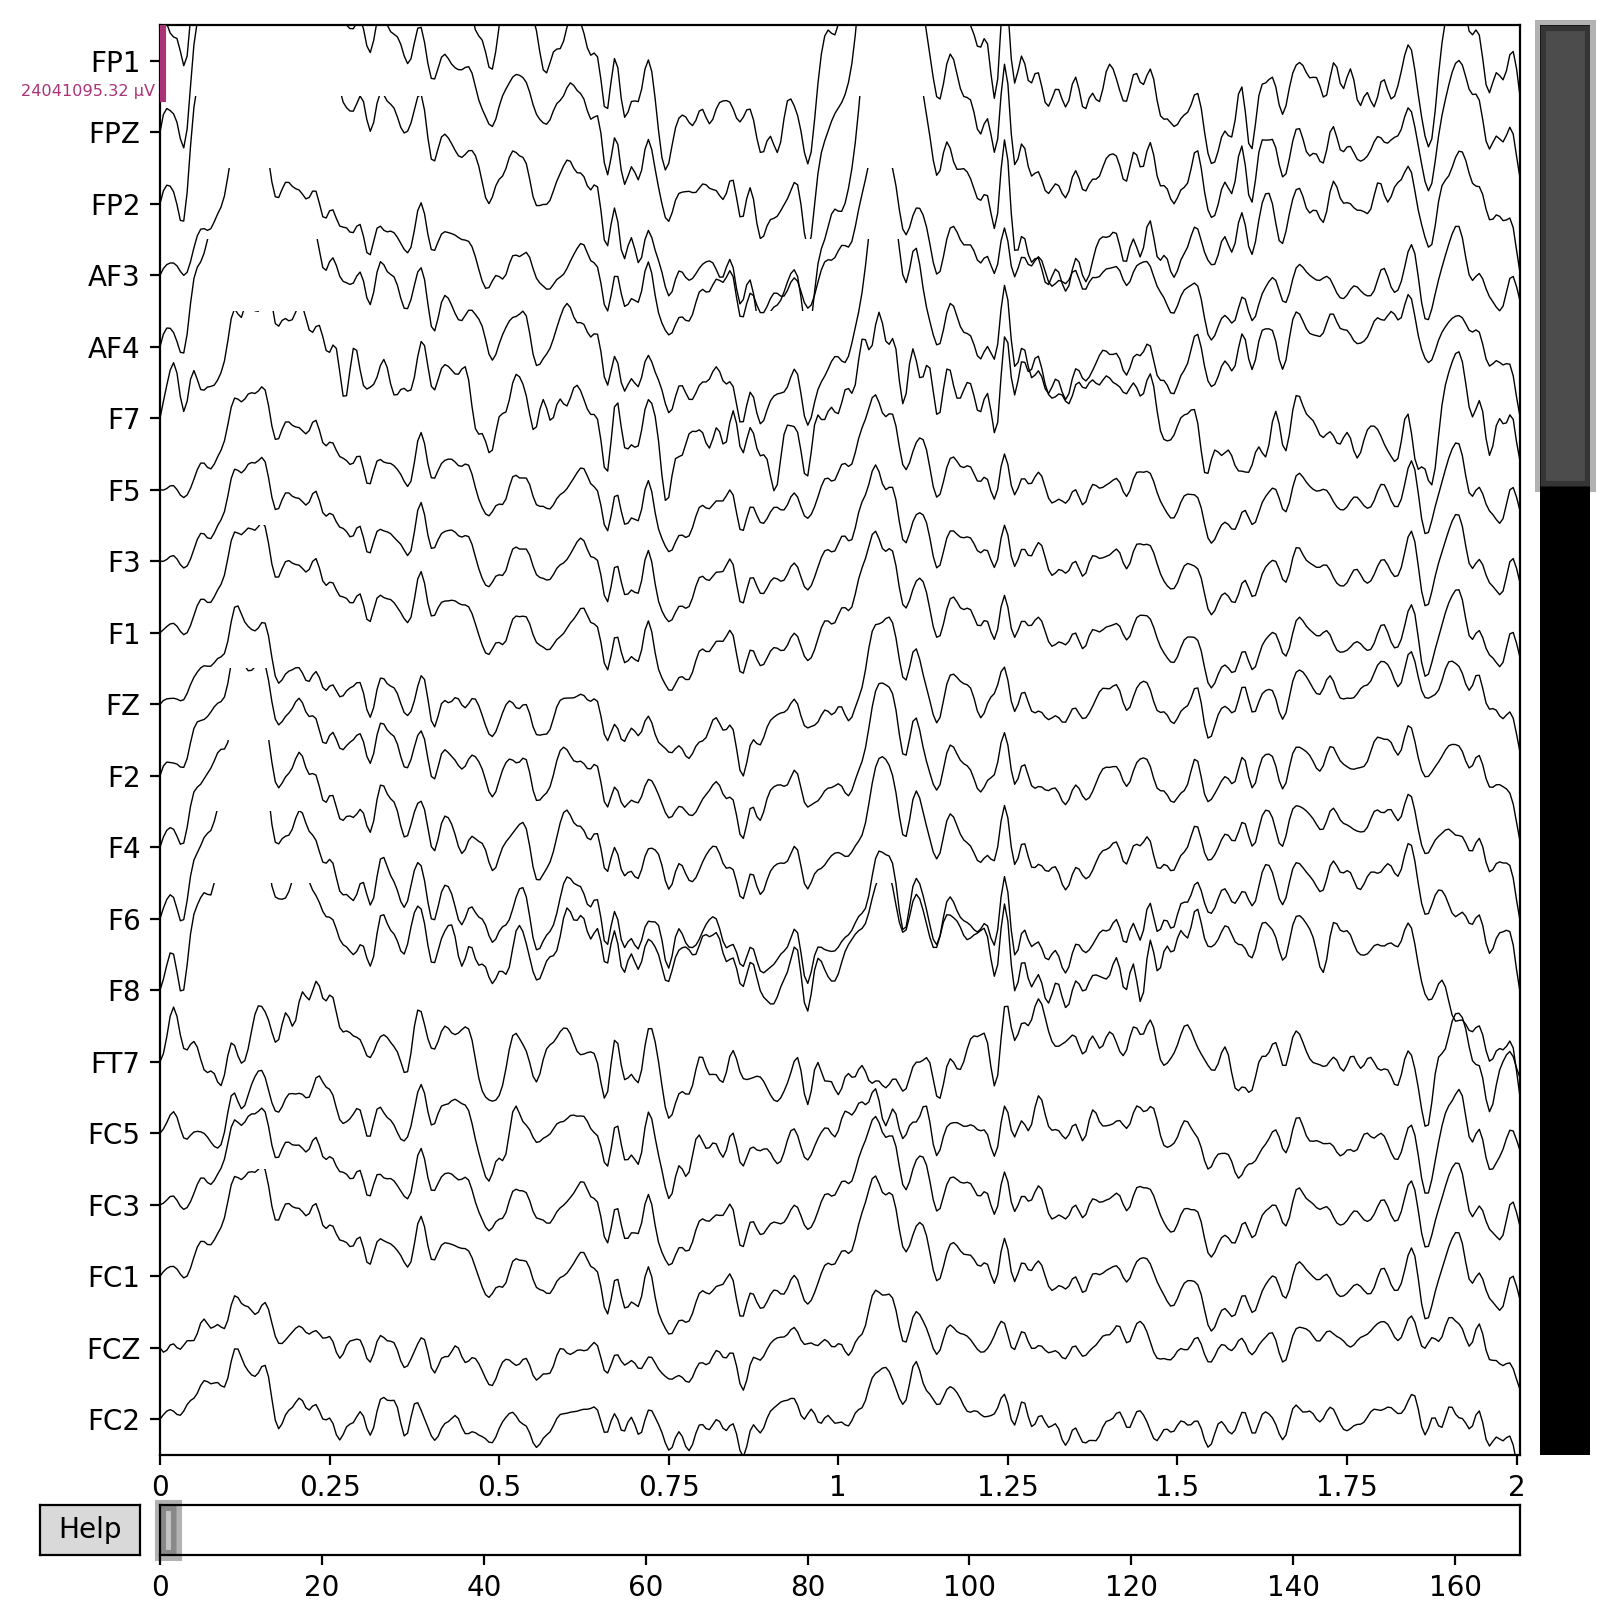

In [25]:
raw_downsampled_bandpass.plot(duration=2, proj=False, n_channels=20, remove_dc=False, scalings='auto')

In [28]:
df= raw_downsampled_bandpass.to_data_frame()
df

time           FP1           FPZ           FP2           AF3  \
0        0.000 -1.776357e-08  1.776357e-09  8.881784e-09  3.552714e-09   
1        0.005  1.034091e+07  5.959139e+06  4.356222e+06  2.249850e+06   
2        0.010  1.245498e+07  7.993240e+06  6.241454e+06  3.587986e+06   
3        0.015  9.326932e+06  7.280686e+06  5.929079e+06  4.114588e+06   
4        0.020  7.986020e+06  6.192247e+06  4.049533e+06  4.109830e+06   
...        ...           ...           ...           ...           ...   
33596  167.980  5.602477e+06  6.258270e+06  5.827294e+06 -1.454212e+06   
33597  167.985  7.141935e+06  8.045890e+06  5.549505e+06 -4.434737e+05   
33598  167.990  7.845790e+06  8.164510e+06  5.747413e+06  7.515480e+05   
33599  167.995  5.546831e+06  5.349114e+06  4.214976e+06  1.012336e+06   
33600  168.000  4.628242e-09 -2.324529e-10  9.447304e-09  2.237793e-09   

                AF4            F7            F5            F3            F1  \
0     -8.437695e-09  8.881784e-09 -5.329071e-09  4.440892e-10  8.881784e-10   
1      4.241093e+06  5.664297e+06 -1.184664e+05 -4.278799e+03  1.050527e+06   
2      6.281240e+06  1.107997e+07  4.201709e+05  6.079999e+05  2.076958e+06   
3      6.211381e+06  1.615092e+07  1.293873e+06  1.596745e+06  2.949504e+06   
4      4.786305e+06  1.867720e+07  1.382293e+06  1.904877e+06  3.173964e+06   
...             ...           ...           ...           ...           ...   
33596  4.563804e+06  1.089966e+07 -2.511562e+06 -2.376486e+06 -1.610690e+06   
33597  5.003659e+06  9.969593e+06 -1.170178e+06 -1.188936e+06 -2.320957e+05   
33598  5.258639e+06  6.881146e+06  3.918163e+05  1.029863e+05  8.167032e+05   
33599  3.739340e+06  3.255771e+06  8.994869e+05  5.721015e+05  8.796952e+05   
33600  2.192690e-09  4.989065e-09  9.679757e-09  1.752071e-09  7.084611e-09   

       ...           PO3           POZ           PO4           PO6  \
0      ...  8.215650e-09  6.883383e-09  8.437695e-09  2.664535e-09   
1      ... -2.803227e+06 -2.756683e+06 -1.085880e+06 -2.661833e+05   
2      ...  2.630398e+06 -7.328077e+05 -4.065291e+05  1.742275e+06   
3      ...  1.269412e+07  4.158964e+06  4.281245e+05  4.060538e+06   
4      ...  1.766591e+07  7.112639e+06 -3.720302e+05  3.914896e+06   
...    ...           ...           ...           ...           ...   
33596  ... -7.715593e+06 -4.126925e+06 -1.850108e+06 -3.343760e+06   
33597  ... -6.668920e+06 -1.946871e+05 -3.439203e+06 -2.534822e+06   
33598  ... -4.242497e+06  4.199580e+06 -1.457501e+06  1.251578e+06   
33599  ... -1.732813e+06  4.577425e+06  5.756432e+05  2.979342e+06   
33600  ...  7.091550e-09 -4.093947e-10  5.509482e-09 -1.526557e-10   

                PO8           CB1            O1            OZ            O2  \
0      1.199041e-08  1.154632e-08  7.993606e-09  7.549517e-09  8.992806e-09   
1     -3.017973e+05 -3.610332e+06 -2.537587e+06 -2.792668e+06 -3.551675e+06   
2      2.088943e+06  1.295697e+06  2.867973e+06  1.474673e+06 -7.615117e+05   
3      5.401371e+06  1.134891e+07  1.264784e+07  9.837012e+06  5.556388e+06   
4      6.399595e+06  1.674453e+07  1.737920e+07  1.459751e+07  8.569184e+06   
...             ...           ...           ...           ...           ...   
33596 -1.681703e+04 -7.456407e+06 -6.702518e+06 -6.571253e+06 -3.450780e+06   
33597  1.781122e+06 -6.758853e+06 -5.847989e+06 -5.932090e+06 -3.961730e+06   
33598  6.253510e+06 -4.851949e+06 -3.767503e+06 -2.830064e+06 -8.796221e+05   
33599  6.580620e+06 -2.358989e+06 -1.544750e+06 -2.447009e+05  1.343128e+06   
33600 -5.412337e-10  2.699230e-09  7.022161e-09  1.253164e-08  2.102485e-09   

                CB2  
0      8.215650e-09  
1     -2.733048e+06  
2      1.591552e+06  
3      9.599305e+06  
4      1.323797e+07  
...             ...  
33596 -7.321315e+05  
33597 -1.528697e+06  
33598 -7.348170e+04  
33599  1.086592e+06  
33600  6.633583e-09  

[33601 rows x 63 columns]

### 3.2 Power Line Noise Filter
Not applied 

# 2. Repairing artifacts with ICA

## 2.1 Filtering to remove slow drifts
Before we run the ICA, an important step is filtering the data to remove low-frequency drifts, which can negatively affect the quality of the ICA fit.A high-pass filter with 1 Hz cutoff frequency is recommended. This is already applied previously.

## 2.2 Fitting ICA

In [27]:
ica = ICA(n_components=15, max_iter="auto", random_state=88)
ica.fit(raw_downsampled_highpass)
ica

NameError: name 'raw_downsampled_highpass' is not defined

## 2.3 Looking at the ICA solution

In [ ]:
# retrieve the fraction of variance in the original data that is explained by our ICA components in the form of a dictionary

explained_var_ratio = ica.get_explained_variance_ratio(raw_downsampled_highpass)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

 the result indicates that approximately 92.77% of the variability in the EEG data can be accounted for or explained by the components considered in the analysis.This level of explanation is quite high, indicating that the chosen components are capturing a significant portion of the underlying patterns or phenomena present in the EEG data.

In [ ]:
# We can also explicitly request for which component(s) and channel type(s) to perform the computation

explained_var_ratio = ica.get_explained_variance_ratio(
    raw_downsampled_highpass, components=[0], ch_type="eeg"
)
# This time, print as percentage.
ratio_percent = round(100 * explained_var_ratio["eeg"])
print(
    f"Fraction of variance in EEG signal explained by first component: "
    f"{ratio_percent}%"
)

In [ ]:
#  show the time series of the ICs. 
# Note that in our call to plot_sources we can use the original, unfiltered Raw_downsampled object. 

ica.plot_sources(raw_downsampled, show_scrollbars=False)

In [ ]:
# visualize the scalp field distribution of each component using plot_components 
# These are interpolated based on the values in the ICA mixing matrix
ica.plot_components()

In [ ]:
# plot an overlay of the original signal against the reconstructed signal with the artifactual ICs excluded

# blinks
ica.plot_overlay(raw_downsampled, exclude=[0], picks="eeg")
# heartbeats
ica.plot_overlay(raw_downsampled, exclude=[1], picks="eeg")

In [ ]:
ica.plot_properties(raw_downsampled, picks=[0, 1])

## 2.4 Selecting ICA components manually

In [ ]:
ica.exclude = [0, 1]  # indices chosen based on various plots above

In [26]:
# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_downsampled.copy()
ica.apply(reconst_raw)

raw_downsampled.plot(scalings='auto', n_channels=30, show_scrollbars=False)
reconst_raw.plot(scalings= 'auto', n_channels=30, show_scrollbars=False
)
del reconst_raw

NameError: name 'ica' is not defined

## 2.5 Using a simulated channel to select ICA components

Although manually excluding ICs seems easy, when processing dozens or hundreds of subjects this can become a tedious, rate-limiting step in the analysis pipeline. One alternative is to use dedicated EOG or ECG sensors as a “pattern” to check the ICs against, and automatically mark for exclusion any ICs that match the EOG/ECG pattern.

In absence of an actual EOG channel, you can simulate one by selecting a frontal EEG channel or creating a bipolar reference from frontal EEG sensors. This simulated channel will serve as a proxy for EOG.

In [ ]:
eog_channel_name = 'FP1'  # chosen frontal EEG channel. FP2 and FPZ also gives same result
ica = ICA(n_components=15, random_state=88)
ica.fit(raw_downsampled)
#ica.exclude = ica.find_bads_eog(raw_downsampled, ch_name=eog_channel_name)

eog_indices, eog_scores = ica.find_bads_eog(raw_downsampled, ch_name=eog_channel_name)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
ica.plot_properties(raw_downsampled, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw_downsampled, show_scrollbars=False)

In [ ]:
ica.apply(raw_downsampled_highpass, exclude = ica.exclude)

### Could not Identify ICs that match the ECG pattern.

## 2.6 Removing muscle ICA components
For EEG, activation of muscles for postural control of the head and neck contaminate the signal as well. 


In [ ]:
# # Automatically identify muscle components
# muscle_indices = ica.find_bads_muscle()

# # # Exclude muscle components
# ica.exclude = muscle_indices